In [1]:
from fastbook import *

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH = path

In [4]:
# tt
str(path)

'/root/.fastai/data/oxford-iiit-pet'

In [5]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [6]:
(path/'images').ls()

(#7393) [Path('images/British_Shorthair_154.jpg'),Path('images/boxer_86.jpg'),Path('images/newfoundland_107.jpg'),Path('images/boxer_4.jpg'),Path('images/Persian_176.jpg'),Path('images/havanese_111.jpg'),Path('images/samoyed_187.jpg'),Path('images/scottish_terrier_143.jpg'),Path('images/american_bulldog_208.jpg'),Path('images/Maine_Coon_27.jpg')...]

In [7]:
img1 = (path/'images').ls()[0]
img1

Path('images/British_Shorthair_154.jpg')

In [8]:
re.findall(r'(.+)_\d+\.\w{3}$',img1.name)

['British_Shorthair']

In [9]:
def get_pet_name(pth):
    return re.findall(r'(.+)_\d+\.\w{3}$',pth.name)[0]

In [10]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=get_pet_name,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224,min_scale=0.75)
)

In [11]:
dls = pets.dataloaders(path/'images')

<AxesSubplot:>

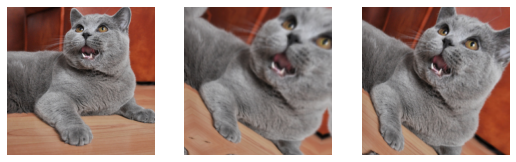

In [24]:
#a comparison between fastai approch and traditional solusion
dblock1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock()),
    get_y=parent_label,
    item_tfms=Resize(460)
)
dls1 = dblock1.dataloaders([(path/'images').ls()[0]]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1,3)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1)
x1 = x1.zoom(draw=1.2, p=1)
x1 = x1.warp(draw_x=-0.2, draw_y = 0.2, p=1)

tfms = setup_aug_tfms([
    Rotate(draw=30, p=1, size=224),
    Zoom(draw=1.2, p=1, size=224),
    Warp(draw_x=-0.2, draw_y=0.2, p=1, size=224)
])

x2 = Pipeline(tfms)(x)

TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1])
TensorImage(x2[0]).show(ctx=axs[2])

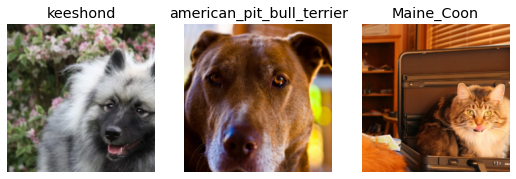

In [25]:
dls.show_batch(nrows=1,ncols=3)

In [27]:
dblock1.summary()

TypeError: summary() missing 1 required positional argument: 'source'

In [29]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.537373,0.341020,0.114344,01:58


epoch,train_loss,valid_loss,error_rate,time
0,0.480547,0.279166,0.088633,02:41
1,0.336538,0.211243,0.062923,02:41


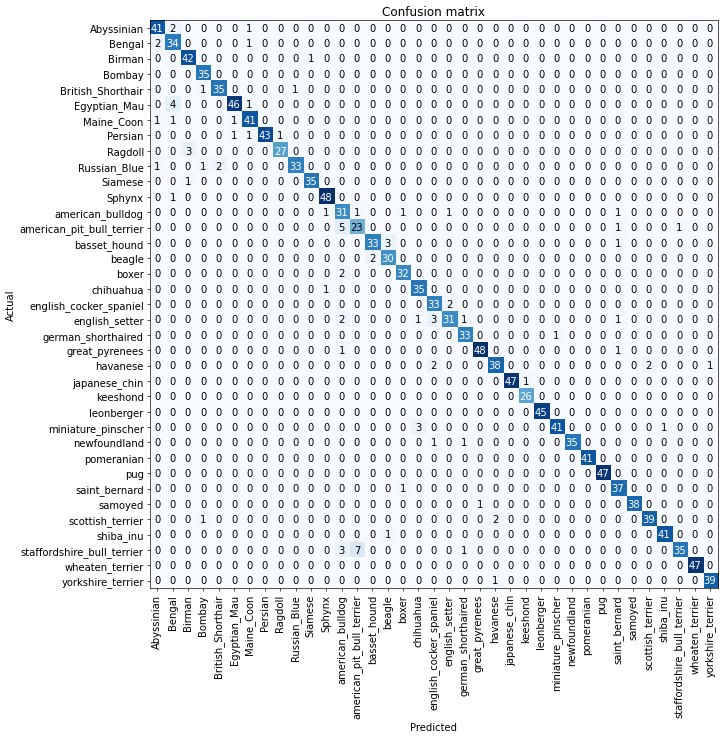

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,15), dpi=60)

In [31]:
interp.most_confused(min_val=5)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

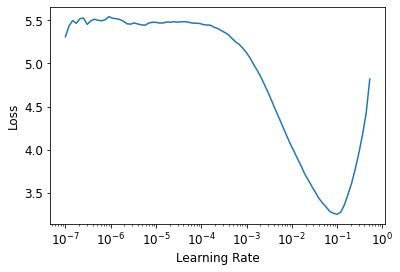

In [33]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [43]:
'{:.2e}'.format(lr_min)

SyntaxError: invalid syntax (<ipython-input-43-aa0ab0ee2595>, line 1)

In [44]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fit_one_cycle(3,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.166693,0.304938,0.096076,01:58
1,0.520932,0.213467,0.064953,01:59
2,0.330874,0.195934,0.066306,01:59


In [45]:
imgs = get_image_files(path/'images')[:10]

In [49]:
imgs[0].

AttributeError: 'PosixPath' object has no attribute 'read'